In [1]:
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import seaborn as sb

import csv

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
def LOS(pos_i, pos_f, pos_usv, Rp):

  xp = np.arctan2(pos_f[1] - pos_i[1], pos_f[0] - pos_i[0]) #Angulo de la ruta con Norte 
  ds = -(pos_usv[0] - pos_i[0]) * np.sin(xp) + (pos_usv[1] - pos_i[1]) * np.cos(xp); #distacia USV ruta
    
  if ( ds > Rp ):
    xd = xp - (np.pi / 2)
    
  elif ( ds < -Rp ) :
    xd = xp + (np.pi / 2)
   
  else:
    xd = xp - np.arcsin(ds / Rp);
  return [xd, ds, xp]

In [90]:
pos_in=[0,0] # [n, e]
pos_fi=[91.47, 0] #[n+1, e+1]
#pos_u=[15.3, 25.4] #[n(t), e(t)]
#pos_u=[3.2760606040113087, 5.388085362385163] #[n(t), e(t)]

pos_u=[100, 10] #[n(t), e(t)]

rp=12;

[a, b, c]=LOS(pos_in, pos_fi, pos_u, rp);
print(a, b, c)

-0.9851107833377457 10.0 0.0


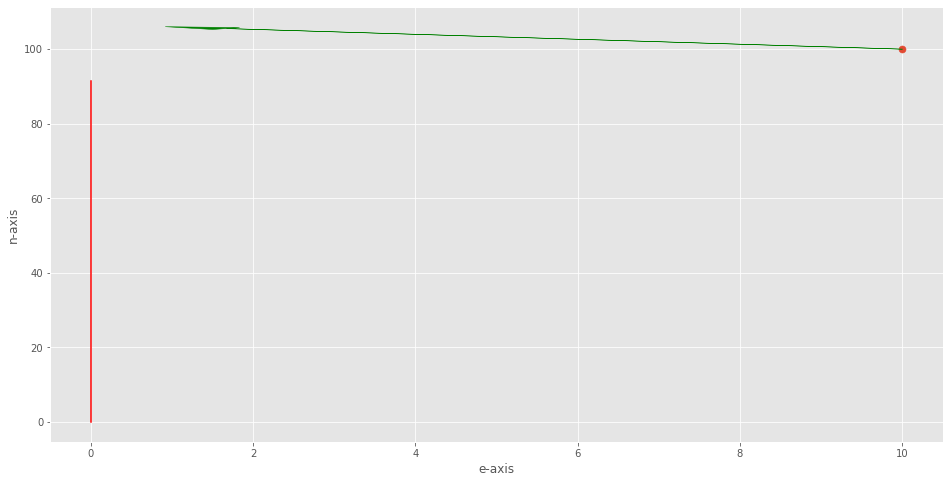

In [91]:

plt.figure(figsize=(16,8))
plt.plot([pos_in[1], pos_fi[1]], [pos_in[0], pos_fi[0]],color="red")

plt.scatter(pos_u[1], pos_u[0],s = 50)

plt.arrow(pos_u[1], pos_u[0],np.abs(b)*np.sin(a), np.abs(b)*np.cos(a) , width = 0.02, head_width=0.6, color="green") 

plt.xlabel("e-axis")
plt.ylabel("n-axis")
plt.show()

In [51]:
def LOS_multi(pos_i, pos_f, pos_usv_n, pos_usv_e, Rp):

  xp = np.arctan2(pos_f[1] - pos_i[1], pos_f[0] - pos_i[0]) #Angulo de la ruta con Norte

  ds=np.zeros(pos_usv_n.shape, dtype=float)
  xd=np.zeros(pos_usv_n.shape, dtype=float) 
 
  for i in range(pos_usv_n.size):
    ds[0][i] = -(pos_usv_n[0][i] - pos_i[0]) * np.sin(xp) + (pos_usv_e[0][i] - pos_i[1]) * np.cos(xp) #distacia USV ruta
    if ( ds[0][i] > Rp ):
      xd[0][i] = xp - (np.pi / 2)    
    elif ( ds[0][i] < -Rp ) :
      xd[0][i] = xp + (np.pi / 2)
    else:
      xd[0][i] = xp - np.arcsin(ds[0][i]/ Rp);
  return [xd, ds, xp]

In [56]:
pos_in_m=[0,0] # [n, e]

pos_fi_m=[91.47, -48.47]
#pos_fi_m=[30, 50] #[n+1, e+1]
rp_m=30
dim=500
pos_east=(pos_fi[1]-pos_in[1])*np.random.random((1,dim))- pos_in[1]
pos_north=(pos_fi[0]-pos_in[0])*np.random.random((1,dim))- pos_in[0]

#pos_east=(-100)*np.random.random((1,dim))
#pos_north=(-100)*np.random.random((1,dim))

[a_m, b_m, c]=LOS_multi(pos_in_m, pos_fi_m, pos_north, pos_east, rp_m);


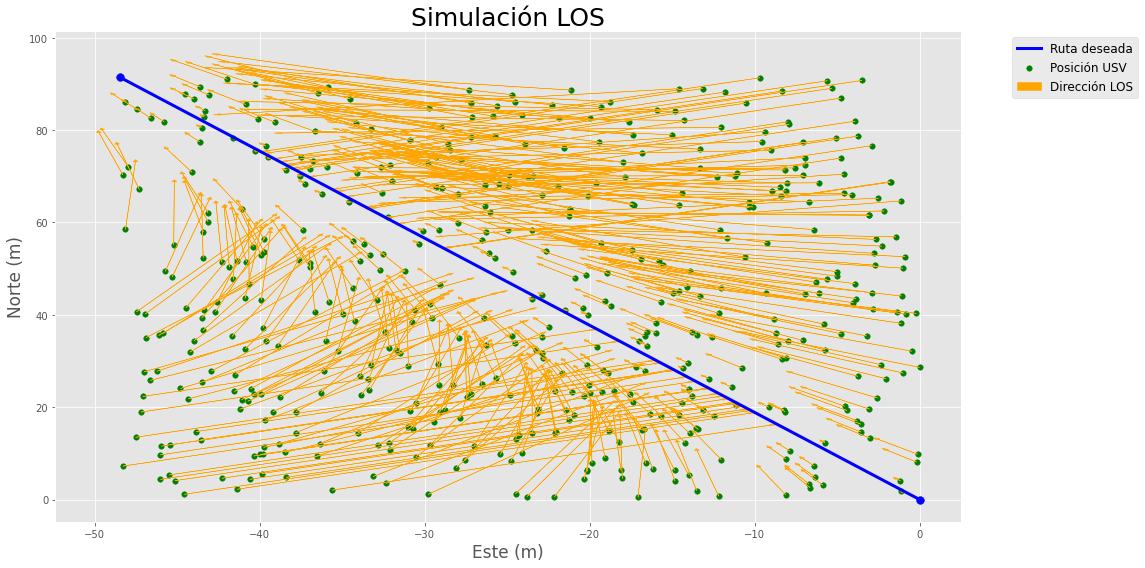

In [57]:
plt.figure(figsize=(16,8))
p=plt.plot([pos_in[1], pos_fi[1]], [pos_in[0], pos_fi[0]],color="blue", linewidth=3.0, label="Ruta deseada")
plt.scatter(pos_in[1], pos_in[0], s = 60, color="blue")
plt.scatter(pos_fi[1], pos_fi[0], s = 60, color="blue")

for i in range (pos_east.size):
  
  usv=plt.scatter(pos_east[0][i], pos_north[0][i], s = 30, color="green")
  arrow=plt.arrow(pos_east[0][i], pos_north[0][i],np.abs(b_m[0][i])*np.sin(a_m[0][i]), np.abs(b_m[0][i])*np.cos(a_m[0][i]) , 
            width = 0.01, head_width=0.3, color="orange", length_includes_head=True) 

plt.title('Simulación LOS', fontsize=25)
plt.xlabel("Este (m)", fontsize=17)
plt.ylabel("Norte (m)", fontsize=17)
plt.legend([p[0],usv, arrow], ["Ruta deseada",  'Posición USV', 'Dirección LOS'], fontsize=12, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig("High resoltion.png",dpi=300)

plt.show()

In [108]:


header = ['north', 'east', 'heading']
dat = [0] * pos_north.size
for i in range (pos_north.size):
  dat[i]= [pos_north[0][i], pos_east[0][i], a_m[0][i]]

with open('data.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerow(header)
    mywriter.writerows(dat)

In [109]:
data = pd.read_csv("./data.csv")
#veamos cuantas dimensiones y registros contiene
data.head()

,north,east,heading
0,17.554308,40.255851,0.244640
1,24.650953,11.709873,2.601173
2,6.169479,47.553943,-0.540420
3,7.406315,37.482307,-0.540420
4,8.387479,36.508269,-0.540420


In [110]:
data.describe()

,north,east,heading
count,10000.000000,10000.000000,10000.000000
mean,15.055326,24.955262,1.040141
std,8.647607,14.368948,1.183624
min,0.000763,0.005593,-0.540420
25%,7.597129,12.702490,-0.202133
50%,15.007916,24.851895,1.039151
75%,22.559593,37.349550,2.343843
max,29.999126,49.997911,2.601173


In [111]:
dataX2 =  pd.DataFrame()
dataX2["north"] = data["north"]
dataX2["east"] = data["east"]
XY_train = np.array(dataX2)
z_train = np.rad2deg(data['heading'].values)

In [112]:
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [ 5.27750978 -3.15883311]
Mean squared error: 380.10
Variance score: 0.92


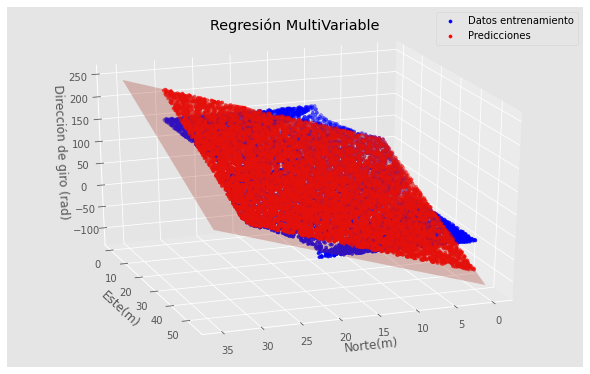

In [127]:
fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 35, num=10), np.linspace(0, 55, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.3)
 
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=10, label='Datos entrenamiento')
 
# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=10, label='Predicciones')

 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=25., azim=70)

#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.legend()

ax.set_xlabel('Norte(m)')
ax.set_ylabel('Este(m)')
ax.set_zlabel('Dirección de giro (rad)')
ax.set_title('Regresión MultiVariable')

plt.savefig("Regresion_multi.png",dpi=300)

In [136]:
z_Dosmil = regr2.predict([[10, 20]])
print(z_Dosmil, regr2.intercept_)

[48.56902206] 58.970586495278624
